### <p style="text-align: right;"> &#9989; Andrew Koren</p>

# PHY480 Day 6

## In-class assignment: Numerical integration

In this in-class assignment we explore the trapezoid and Simpson's rules for numerical integration.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy


Consider the following test functions: $x^4$, $\ln(x)$ and $\sin(20000\pi x+1/\sqrt{3})$.

In [2]:
def test_fun1( x ):
    return x**4

def test_fun2( x ):
    return np.log( x )

def test_fun3( x ):
    return np.sin( 20000*np.pi*x + 1/np.sqrt(3) )


**Task 1.** Code the trapezoid rule.

In [19]:
# numerical integration with the trapezoid rule
# Input:
# fun -- function to be integrated, callable
# a, b -- range
# N -- number of subintervals for integration, step size h=(b-a)/(N-1)
# Output:
# definite integral, scalar
def integrate_trapezoid( fun, a, b, N ):
    output_array = fun(np.linspace(a, b, N))
    output_array[1:-1] *= 2

    return output_array.sum() * (b-a)/(2*N)


In [39]:
print(
    integrate_trapezoid(test_fun1, 0, 5, 1000),
    integrate_trapezoid(test_fun2, 1, np.e, 1000),
    integrate_trapezoid(test_fun3, 0, 1, 1000)
)


624.3760427092716 0.9989998443167418 -4.8434145583087226e-14


**Task 2.** Code Simpson's rule.

In [92]:
# numerical integration with Simpson's rule
# Input:
# fun -- function to be integrated, callable
# a, b -- range
# N -- number of subintervals for integration, has to be odd, step size h=(b-a)/(N-1)
# Output:
# definite integral, scalar
def integrate_simpson( fun, a, b, N ):
    if N % 2 == 1:
        N += 1 # makes steps but that's okay

    h = (b-a)/N
    s = fun(a) + fun(b)

    for k in range(1,N,2): # gets over the N-1 thing
        s += 4*fun(a+k*h)
    for k in range(2, N-1,2):
        s += 2*fun(a+k*h)
    
    return s*h/3

print(
    integrate_simpson(test_fun1, 0, 5, 1000),
    integrate_simpson(test_fun2, 1, np.e, 1000),
    integrate_simpson(test_fun3, 0, 1, 1000)
)

625.0000000004164 0.9999999999999082 0.5458056146725282


**Task 3.** Integrate the first test function with the trapezoid and Simpson's rules in the range $[0,3]$. Use only odd values of $N$ from 3 to 101. Analytically compute the exact value of the integral and compute the distance from the numerical to the exact solution, defined as $d(N)=|\text{exact}-\text{numerical}|$. Plot $d(N)$ versus $1/N$ on a log-log plot.

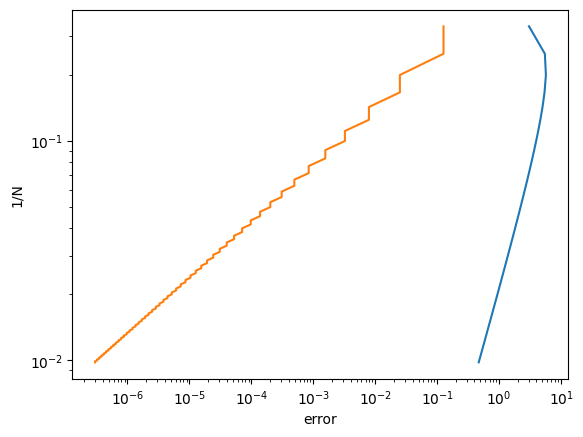

In [95]:
test_fun1_exact = lambda x: x**5/5 #int(f)|_a^b = F(b)-F(a)

exact = test_fun1_exact(3) - test_fun1_exact(0)

N_vals = np.arange(3, 103)

d1 = [abs(exact-integrate_trapezoid(test_fun1, 0, 3, N)) for N in N_vals]
d2 = [abs(exact-integrate_simpson(test_fun1, 0, 3, N)) for N in N_vals]

plt.plot(d1, 1/N_vals)
plt.plot(d2, 1/N_vals)
plt.xlabel('error')
plt.ylabel('1/N')
plt.loglog();

**Task 4.** Repeat the same exercise as in the previous task for the second test function in the range $[1,3]$. Analytically compute the integral and plot the distance as in the previous task.

In [70]:
import sympy as sym

x_sym = sym.symbols('x')

print(sym.integrate(sym.ln(x_sym), x_sym))
print(sym.integrate(sym.sin(20000*sym.pi*x_sym + 1/sym.sqrt(3)), x_sym))



x*log(x) - x
-cos(20000*pi*x + sqrt(3)/3)/(20000*pi)


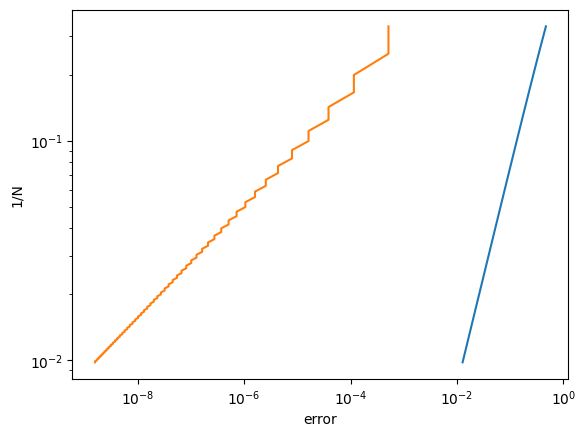

In [94]:
from numpy import log

test_fun2_exact = lambda x: x*log(x) - x

exact = test_fun2_exact(3) - test_fun2_exact(1)

N_vals = np.arange(3, 103)

d1 = [abs(exact-integrate_trapezoid(test_fun2, 1, 3, N)) for N in N_vals]
d2 = [abs(exact-integrate_simpson(test_fun2, 1, 3, N)) for N in N_vals]

plt.plot(d1, 1/N_vals)
plt.plot(d2, 1/N_vals)
plt.xlabel('error')
plt.ylabel('1/N')
plt.loglog();


**Task 5.** Repeat the same exercise as in the previous task for the third test function in the range $[0,1]$. Analytically compute the integral and plot the distance as in the previous task.

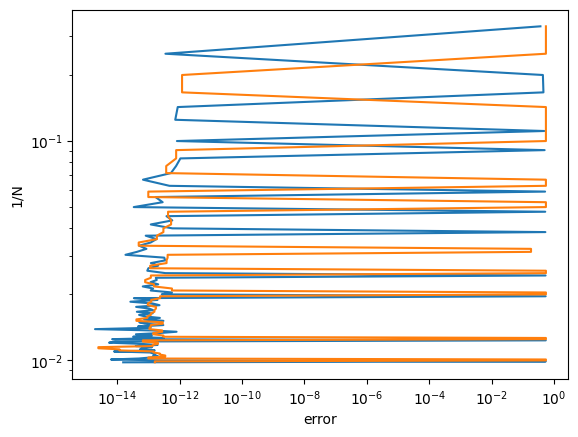

In [96]:
from numpy import cos, pi, sqrt

test_fun3_exact = lambda x: -cos(20000*pi*x + sqrt(3)/3)/(20000*pi)

exact = test_fun3_exact(1) - test_fun3_exact(0)

N_vals = np.arange(3, 103)

d1 = [abs(exact-integrate_trapezoid(test_fun3, 0, 1, N)) for N in N_vals]
d2 = [abs(exact-integrate_simpson(test_fun3, 0, 1, N)) for N in N_vals]

plt.plot(d1, 1/N_vals)
plt.plot(d2, 1/N_vals)
plt.xlabel('error')
plt.ylabel('1/N')
plt.loglog();

**Task 6.** Read the documentation on the `scipy.integrate.quad` function and use it to perform the integral from the previous task (third test function). Try with default parameters, then try to increase the `limit` parameter, until the result is satisfactory. Print out the result and compare to the exact solution.


In [113]:
import scipy.integrate


abs(exact - scipy.integrate.quad(test_fun3, 0, 1, limit=1000))
# better than best of simpson & trapz

array([6.82122396e-15, 7.70002831e-14])

&#169; Copyright 2025,  Michigan State University Board of Trustees